# **Projeto: Calcular risco de portfólio de ações**

>Importando bibliotecas Python 

In [2]:
import pandas as pd
import numpy as np
import plotly.express as px
import yfinance as yf
import matplotlib.pyplot as plt 
import seaborn as sns

>Buscando ações na base de dados da Bolsa

In [3]:
busca_acoes = ['PETR4.SA', 'VALE3.SA', 'BBDC4.SA', 'RENT3.SA', 'BRFS3.SA','BOVA11.SA']
# Criando uma variável para receber DataFrame utilizando o pandas...
dataset2024 = pd.DataFrame()
for acao in busca_acoes:
    dataset2024[acao] = yf.download(acao, start= '2020-1-1')['Close']

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


> Visualizando as ações no período requerido:

In [4]:
dataset2024

,PETR4.SA,VALE3.SA,BBDC4.SA,RENT3.SA,BRFS3.SA,BOVA11.SA
Date,,,,,,
2020-01-02,30.700001,54.330002,28.181818,49.619999,35.880001,114.239998
2020-01-03,30.450001,53.930000,28.181818,48.900002,35.939999,113.800003
2020-01-06,30.809999,53.610001,27.678436,48.330002,35.570000,112.589996
2020-01-07,30.690001,54.000000,27.197596,48.799999,35.160000,112.239998
2020-01-08,30.500000,54.009998,26.776859,48.560001,36.509998,111.949997
...,...,...,...,...,...,...
2024-01-17,37.880001,69.349998,15.760000,60.939999,12.570000,124.529999
2024-01-18,37.730000,69.000000,15.670000,59.360001,12.410000,123.559998
2024-01-19,37.529999,68.099998,15.640000,60.090000,13.000000,123.839996


> Renomeando colunas:

In [5]:
dataset2024 = dataset2024.rename(columns={'PETR4.SA': 'PETROBRAS', 'VALE3.SA': 'VALE', 'BBDC4.SA': 'BRADESCO', 'RENT3.SA': 'RENTACAR', 'BRFS3.SA': 'BRFOOD', 'BOVA11.SA': 'BOVA'})
dataset2024

,PETROBRAS,VALE,BRADESCO,RENTACAR,BRFOOD,BOVA
Date,,,,,,
2020-01-02,30.700001,54.330002,28.181818,49.619999,35.880001,114.239998
2020-01-03,30.450001,53.930000,28.181818,48.900002,35.939999,113.800003
2020-01-06,30.809999,53.610001,27.678436,48.330002,35.570000,112.589996
2020-01-07,30.690001,54.000000,27.197596,48.799999,35.160000,112.239998
2020-01-08,30.500000,54.009998,26.776859,48.560001,36.509998,111.949997
...,...,...,...,...,...,...
2024-01-17,37.880001,69.349998,15.760000,60.939999,12.570000,124.529999
2024-01-18,37.730000,69.000000,15.670000,59.360001,12.410000,123.559998
2024-01-19,37.529999,68.099998,15.640000,60.090000,13.000000,123.839996


> Verificando se há ações nulas:

In [6]:
dataset2024.isnull().sum()

PETROBRAS    0
VALE         0
BRADESCO     0
RENTACAR     0
BRFOOD       0
BOVA         0
dtype: int64

*Obs.: Não foram localizadas ações nulas!*
________________________________________________________________________________________________________________________________________________________________ 

> Salvando os dados em arquivo .csv

In [7]:
dataset2024.to_csv('acoes.csv')

> Lendo o arquivo 'acoes.csv'...

In [8]:
dataset2024 = pd.read_csv('acoes.csv')
dataset2024

,Date,PETROBRAS,VALE,BRADESCO,RENTACAR,BRFOOD,BOVA
0,2020-01-02,30.700001,54.330002,28.181818,49.619999,35.880001,114.239998
1,2020-01-03,30.450001,53.930000,28.181818,48.900002,35.939999,113.800003
2,2020-01-06,30.809999,53.610001,27.678436,48.330002,35.570000,112.589996
3,2020-01-07,30.690001,54.000000,27.197596,48.799999,35.160000,112.239998
4,2020-01-08,30.500000,54.009998,26.776859,48.560001,36.509998,111.949997
...,...,...,...,...,...,...,...
1004,2024-01-17,37.880001,69.349998,15.760000,60.939999,12.570000,124.529999
1005,2024-01-18,37.730000,69.000000,15.670000,59.360001,12.410000,123.559998
1006,2024-01-19,37.529999,68.099998,15.640000,60.090000,13.000000,123.839996
1007,2024-01-22,37.700001,67.800003,15.460000,58.709999,13.640000,122.699997


> Verificando a quantidade de registros:

In [9]:
dataset2024.shape

(1009, 7)

> Efetuando a exclusão da coluna 'Date' 

In [10]:
dataset2024.drop(labels=['Date'], axis=1, inplace=True)
dataset2024

,PETROBRAS,VALE,BRADESCO,RENTACAR,BRFOOD,BOVA
0,30.700001,54.330002,28.181818,49.619999,35.880001,114.239998
1,30.450001,53.930000,28.181818,48.900002,35.939999,113.800003
2,30.809999,53.610001,27.678436,48.330002,35.570000,112.589996
3,30.690001,54.000000,27.197596,48.799999,35.160000,112.239998
4,30.500000,54.009998,26.776859,48.560001,36.509998,111.949997
...,...,...,...,...,...,...
1004,37.880001,69.349998,15.760000,60.939999,12.570000,124.529999
1005,37.730000,69.000000,15.670000,59.360001,12.410000,123.559998
1006,37.529999,68.099998,15.640000,60.090000,13.000000,123.839996
1007,37.700001,67.800003,15.460000,58.709999,13.640000,122.699997


> Calculando taxas de retorno simples, para fazermos o comparativo entre várias ações de várias empresas em um determinado periodo de tempo.

In [11]:
taxa_retorno = (dataset2024 / dataset2024.shift(1)) - 1
taxa_retorno

,PETROBRAS,VALE,BRADESCO,RENTACAR,BRFOOD,BOVA
0,NaN,NaN,NaN,NaN,NaN,NaN
1,-0.008143,-0.007362,0.000000,-0.014510,0.001672,-0.003851
2,0.011823,-0.005934,-0.017862,-0.011656,-0.010295,-0.010633
3,-0.003895,0.007275,-0.017372,0.009725,-0.011527,-0.003109
4,-0.006191,0.000185,-0.015470,-0.004918,0.038396,-0.002584
...,...,...,...,...,...,...
1004,-0.005774,-0.017984,0.001907,0.010949,-0.035303,-0.007650
1005,-0.003960,-0.005047,-0.005711,-0.025927,-0.012729,-0.007789
1006,-0.005301,-0.013044,-0.001914,0.012298,0.047542,0.002266
1007,0.004530,-0.004405,-0.011509,-0.022966,0.049231,-0.009205


> Correlação entre as ações:

In [12]:
taxa_retorno.cov()

,PETROBRAS,VALE,BRADESCO,RENTACAR,BRFOOD,BOVA
PETROBRAS,0.000976,0.000371,0.000405,0.000417,0.000360,0.000392
VALE,0.000371,0.000656,0.000250,0.000238,0.000200,0.000284
BRADESCO,0.000405,0.000250,0.000612,0.000404,0.000336,0.000338
RENTACAR,0.000417,0.000238,0.000404,0.000951,0.000422,0.000391
BRFOOD,0.000360,0.000200,0.000336,0.000422,0.001201,0.000313
BOVA,0.000392,0.000284,0.000338,0.000391,0.000313,0.000315


> Obs.: Como os valores das ações são muito pequenos efetua-se o calculo das correlações conforme o código abaixo...

Calculo das correlações:

> Tabela utilizada para verificar a correlação entre as ações tanto de empresas de nichos diferentes quanto iguais

In [13]:
# Empresas BOVA: http://bvmf.bmfbovespa.com.br/indices/ResumoCarteiraQuadrimestre.aspx?Indice=IBOV&idioma=pt-br
taxa_retorno.corr()

,PETROBRAS,VALE,BRADESCO,RENTACAR,BRFOOD,BOVA
PETROBRAS,1.000000,0.463575,0.524487,0.433173,0.332517,0.707260
VALE,0.463575,1.000000,0.394945,0.301878,0.224947,0.625160
BRADESCO,0.524487,0.394945,1.000000,0.530409,0.392544,0.769305
RENTACAR,0.433173,0.301878,0.530409,1.000000,0.394827,0.713370
BRFOOD,0.332517,0.224947,0.392544,0.394827,1.000000,0.508857
BOVA,0.707260,0.625160,0.769305,0.713370,0.508857,1.000000


Gráfico de correlação de ações:

> Obs.: Verifica a correlação entre as ações indicando as fortes das fracas

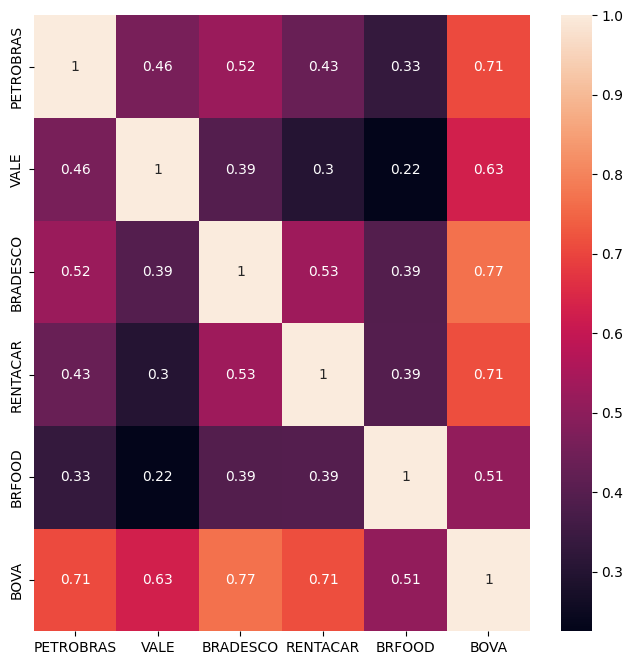

In [14]:
plt.figure(figsize=(8, 8))
sns.heatmap(taxa_retorno.corr(), annot=True);

### "Tudo sobre Correlação de Ações: Entenda a Força e Fraqueza nas Relações de Preços"

A correlação entre ações refere-se à medida estatística que descreve a relação entre os movimentos de preços de duas ou mais ações. A correlação pode ser positiva, negativa ou neutra.

- Correlação Positiva: Quando duas ações têm uma correlação positiva, seus preços geralmente se movem na mesma direção. Se uma ação sobe, a outra também tende a subir, e vice-versa.

- Correlação Negativa: Se duas ações têm uma correlação negativa, seus preços geralmente se movem em direções opostas. Quando uma ação sobe, a outra tende a cair, e vice-versa.

- Correlação Neutra: Indica que não há uma relação significativa entre os movimentos de preços das ações; seus caminhos são independentes.

A força ou fraqueza da correlação é medida pelo coeficiente de correlação, que varia de -1 a 1. Um valor próximo de 1 indica uma forte correlação positiva, enquanto um valor próximo de -1 indica uma forte correlação negativa. Um valor próximo de 0 sugere uma correlação fraca ou neutra.

Por exemplo, se você possui ações de empresas em setores diferentes, como tecnologia e energia, e essas ações têm uma correlação negativa, isso pode ser benéfico para diversificar seu portfólio. Se uma ação enfraquece, a outra pode se fortalecer, ajudando a equilibrar o risco.

Em resumo, entender a correlação entre ações é crucial para construir um portfólio diversificado e gerenciar o risco de investimento. A força ou fraqueza dessa correlação determina como as ações se movem em relação umas às outras.
______________________________________________________________________________________________________________________________________________________________

# **Risco de portifólio de ações**

In [15]:
taxa_retorno

,PETROBRAS,VALE,BRADESCO,RENTACAR,BRFOOD,BOVA
0,NaN,NaN,NaN,NaN,NaN,NaN
1,-0.008143,-0.007362,0.000000,-0.014510,0.001672,-0.003851
2,0.011823,-0.005934,-0.017862,-0.011656,-0.010295,-0.010633
3,-0.003895,0.007275,-0.017372,0.009725,-0.011527,-0.003109
4,-0.006191,0.000185,-0.015470,-0.004918,0.038396,-0.002584
...,...,...,...,...,...,...
1004,-0.005774,-0.017984,0.001907,0.010949,-0.035303,-0.007650
1005,-0.003960,-0.005047,-0.005711,-0.025927,-0.012729,-0.007789
1006,-0.005301,-0.013044,-0.001914,0.012298,0.047542,0.002266
1007,0.004530,-0.004405,-0.011509,-0.022966,0.049231,-0.009205


> Definindo pesos para todas as ações menos para 'BOVA'

In [16]:
dataset2024.columns

Index(['PETROBRAS', 'VALE', 'BRADESCO', 'RENTACAR', 'BRFOOD', 'BOVA'], dtype='object')

> Taxas de retorno anualizada:

Obs.: apresenta o risco das ações.

In [17]:
import math


taxa_retorno.std() * math.sqrt(246)  # anualizada

PETROBRAS    0.490087
VALE         0.401572
BRADESCO     0.387905
RENTACAR     0.483634
BRFOOD       0.543484
BOVA         0.278447
dtype: float64

>Obs.: O intuito é calcularmos o risco de investir em uma carteira de ações individuais, para verificar se o risco é maior ou menor, do que fazer investimento diretamente no indice Ibovespa.

In [18]:
pesos1 = np.array([0.2, 0.2, 0.2, 0.2, 0.2, 0.0])

In [19]:
# Lembrando que a soma dos pesos das ações tem que ter o resultado de 1.0...
pesos1.sum()

1.0

> Gerando a matriz de covariância anual:

> Multiplicando-se a taxa de retorno covariante por **246** que é o **número de dias** que a Bolsa de Valores atuou no mercado no ano...

In [20]:
taxa_retorno.cov() * 246

,PETROBRAS,VALE,BRADESCO,RENTACAR,BRFOOD,BOVA
PETROBRAS,0.240186,0.091234,0.099709,0.102672,0.088567,0.096515
VALE,0.091234,0.161260,0.061521,0.058629,0.049094,0.069903
BRADESCO,0.099709,0.061521,0.150470,0.099507,0.082756,0.083093
RENTACAR,0.102672,0.058629,0.099507,0.233902,0.103779,0.096067
BRFOOD,0.088567,0.049094,0.082756,0.103779,0.295375,0.077006
BOVA,0.096515,0.069903,0.083093,0.096067,0.077006,0.077533


> Calculando a covariância:

In [21]:
# Script efetua o calculo para multiplicar as matriz com os pesos. 
np.dot(taxa_retorno.cov() * 246, pesos1)

array([0.12447359, 0.08434781, 0.09879274, 0.11969766, 0.12391432,
       0.08451683])

> Calculo da variância do portfólio:

In [22]:
variancia_portfolio = np.dot(pesos1, np.dot(taxa_retorno.cov() * 246, pesos1))
variancia_portfolio

0.11024522168483178

> Calculo do desvio padrão do portfólio:

In [23]:
# Multiplicando por (* 100) para encontrar o resultado do desvio padrão em percentual... 
volatilidade_portfolio = np.sqrt(variancia_portfolio) * 100
volatilidade_portfolio

33.20319588305195

> Calculando a variância da ação 'BOVA':

In [24]:
pesos2 = np.array([0.0, 0.0, 0.0, 0.0, 0.0, 1.0])
pesos2

array([0., 0., 0., 0., 0., 1.])

In [25]:
"""
    Primeiro efetuará a multiplicação entre as matrizes: 'pesos2' e 'np.dot(taxa_retorno.cov() * 246)'
    e depois o resultado será multiplicado pela matriz: 'pesos2'...
"""
variancia_portfolio2 = np.dot(pesos2, np.dot(taxa_retorno.cov() * 246, pesos2))
variancia_portfolio2

0.07753254166862372

> Calculando o desvio padrão da ação da'BOVA':

In [26]:
volatilidade_portfolio2 = np.sqrt(variancia_portfolio2) * 100
volatilidade_portfolio2

27.844665856968675

> Obs.: *Quando criamos a matriz de ações acima, utilizamos valores e não a transformamos em percentual. Portanto, nos calculos, foram inseridas multiplicações por 100 para gerar resultados em "percentuais"*...
___________________________________________________________________________________________________________________________________________________________________________________________

# Risco sistemático e não sistemático:

- Risco sistemático: muda diáriamente no preço das ações, devido a eventos como recessão da ecônomia, comportamento do cliente (evento externo). Não pode ser eliminado e pode afetar todas as empresas.

- Risco não sistemático: Eventos específicos na empresa (depende do tipo de empresa).


**Calcular o risco não sistemático**, também conhecido como risco específico ou risco idiossincrático, **é considerado essencial na análise de risco de um portfólio**. O risco não sistemático refere-se à parte do risco de um ativo ou de um portfólio que é específica da empresa ou do setor e que pode ser reduzida por meio de diversificação.

Ao construir um portfólio, os investidores procuram reduzir o risco total incorporando diferentes ativos em classes de ativos distintas. <u>O risco não sistemático é diversificável</u>, o que significa que ele pode ser mitigado ao espalhar os investimentos por diferentes ativos. Se um investidor possui um <u>portfólio concentrado em um único setor ou empresa, estará mais exposto ao risco não sistemático associado a essas escolhas específicas.</u>

A análise do risco não sistemático permite aos investidores avaliar a eficácia da diversificação em seu portfólio. *Se o risco não sistemático for significativo, pode indicar que o portfólio ainda não está adequadamente diversificado, e há oportunidades para reduzir o risco total por meio da inclusão de ativos adicionais.*

Portanto, ao analisar o risco de um portfólio, é fundamental considerar tanto o <u>risco sistemático quanto o não sistemático</u>, e a <u>diversificação</u> é uma estratégia comumente utilizada para gerenciar o risco não sistemático.


In [27]:
taxa_retorno

,PETROBRAS,VALE,BRADESCO,RENTACAR,BRFOOD,BOVA
0,NaN,NaN,NaN,NaN,NaN,NaN
1,-0.008143,-0.007362,0.000000,-0.014510,0.001672,-0.003851
2,0.011823,-0.005934,-0.017862,-0.011656,-0.010295,-0.010633
3,-0.003895,0.007275,-0.017372,0.009725,-0.011527,-0.003109
4,-0.006191,0.000185,-0.015470,-0.004918,0.038396,-0.002584
...,...,...,...,...,...,...
1004,-0.005774,-0.017984,0.001907,0.010949,-0.035303,-0.007650
1005,-0.003960,-0.005047,-0.005711,-0.025927,-0.012729,-0.007789
1006,-0.005301,-0.013044,-0.001914,0.012298,0.047542,0.002266
1007,0.004530,-0.004405,-0.011509,-0.022966,0.049231,-0.009205


> Pesos da primeira carteira que são todas as ações indivíduais menos a 'BOVA'.

In [28]:
pesos1

array([0.2, 0.2, 0.2, 0.2, 0.2, 0. ])

> Pesos da segunda carteira que é a ação da 'BOVA'.

In [29]:
pesos2

array([0., 0., 0., 0., 0., 1.])

> **Calculo da variância** - quanto que os dados estão variando comparando com a média...

In [30]:
# O calculo da variância anual vem antes de efetuar o calculo do desvio padrão...
taxa_retorno.var() * 246

PETROBRAS    0.240186
VALE         0.161260
BRADESCO     0.150470
RENTACAR     0.233902
BRFOOD       0.295375
BOVA         0.077533
dtype: float64

> Calculo das variâncias anuais pelos pesos...

In [31]:
variancia_pesos1 = (taxa_retorno.var() * 246) * pesos1
variancia_pesos1

PETROBRAS    0.048037
VALE         0.032252
BRADESCO     0.030094
RENTACAR     0.046780
BRFOOD       0.059075
BOVA         0.000000
dtype: float64

> Calculo do risco não sistemático...

*Obs.: efetua-se subtração!*

In [32]:
from functools import reduce
import operator
# Calculando através da subtração das variâncias...
sub = []
# Loop para adicionar o valor das variancias na lista: 'sub'
for i in range(5):
    sub.append(variancia_pesos1[i])

# Variável: 'resultado_subtração' recebe através da função reduce o resultado da subtração... 
resultado_subtracao = reduce(operator.sub, sub)
resultado_subtracao


-0.12016426003030549

> Variância do portfólio:

In [33]:
variancia_portfolio

0.11024522168483178

> Para calcular o risco não sistemático deve-se subtrair o valor da variância do portfólio pelo valor do resultado da subtração

In [34]:
risco_nao_sistematico = (variancia_portfolio - resultado_subtracao) 
risco_nao_sistematico

0.23040948171513725

>Calculo do risco não sistemático2:

In [35]:
variancia_pesos2 = (taxa_retorno.var() * 246) * pesos2
variancia_pesos2

PETROBRAS    0.000000
VALE         0.000000
BRADESCO     0.000000
RENTACAR     0.000000
BRFOOD       0.000000
BOVA         0.077533
dtype: float64

> Efetuando a subtração das variâncias2...

In [36]:
# Calculando através da subtração das variâncias...
sub2 = []
# Loop para adicionar o valor das variancias na lista: 'sub2'
for i in range(5):
    sub2.append(variancia_pesos2[i])

# Variável: 'resultado_subtração' recebe através da função reduce o resultado da subtração... 
resultado_subtracao2 = reduce(operator.sub, sub2)
resultado_subtracao2

0.0

> variancia_portfolio2

In [37]:
risco_nao_sistematico2 = (variancia_portfolio2 - resultado_subtracao2)
risco_nao_sistematico2

0.07753254166862372

### **Conclusão:**

>O resultado é que o risco não sistemático é menor na Carteira 2 - 0.0775557 (composta apenas pela ação 'BOVA') em comparação com a Carteira 1 - 0.2302607 (composta por ações individuais). Portanto, em termos de risco não sistemático, investir na Carteira 2 é considerado mais conservador do que investir nas ações individuais da Carteira 1. 

___________________________________________________________________________________________________________________________________________________________________________________________
# Complemento:

Determinar se um valor específico de risco não sistemático é considerado elevado ou aceitável depende do contexto do investimento, dos objetivos e da tolerância ao risco do investidor. Não existe um valor único considerado universalmente elevado ou aceitável, pois isso varia de acordo com as circunstâncias e as preferências individuais.

A interpretação do valor de risco não sistemático deve ser feita em comparação com outros indicadores, como o risco total do portfólio, a taxa de retorno esperada e a meta de risco do investidor. Aqui estão algumas considerações gerais:

1. **Comparação com o Risco Total do Portfólio:** Se o risco não sistemático for uma parte significativa do risco total do portfólio, pode indicar uma falta de diversificação eficaz. Nesse caso, pode ser desejável buscar uma maior diversificação para reduzir o risco específico.

2. **Tolerância ao Risco do Investidor:** Investidores com diferentes perfis de risco podem ter tolerâncias variadas para o risco não sistemático. Alguns investidores podem estar dispostos a aceitar um nível mais elevado de risco específico em troca de retornos potencialmente mais altos, enquanto outros podem preferir uma abordagem mais conservadora.

3. **Objetivos Financeiros:** Se o objetivo do investidor for otimizar o equilíbrio entre risco e retorno, pode ser necessário ajustar a alocação de ativos para alcançar um nível de risco que esteja alinhado com seus objetivos financeiros.

4. **Contexto de Mercado:** Em períodos de volatilidade ou condições de mercado adversas, os investidores podem revisar suas estratégias de investimento e tolerância ao risco. Um valor de risco não sistemático pode ser avaliado de maneira diferente em diferentes contextos de mercado.

Portanto, é recomendável avaliar o valor de risco não sistemático em conjunto com outros fatores relevantes para a situação específica do investidor. Se possível, consultar um consultor financeiro pode fornecer uma perspectiva mais personalizada e orientada para a situação individual.
___________________________________________________________________________________________________________________________________________________________________________________________